In [28]:
from pathlib import Path
from sklearn.metrics import confusion_matrix
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
import pandas.util.testing as tm
import numpy as np
import os
import shutil
import re
import seaborn as sns
from pathlib import Path

In [29]:
os.listdir(os.path.join(os.getcwd(),"testdir"))

['models', 'test', 'train', 'valid']

In [30]:
def split_indices(folder, seed1, seed2):    
    n = len(os.listdir(folder))
    full_set = list(range(1, n+1))

    random.seed(seed1)
    train = random.sample(list(range(1, n+1)), int(.5*n))

    remain = list(set(full_set) - set(train))

    random.seed(seed2)
    valid = random.sample(remain, int(.5*len(remain)))
    test = list(set(remain) - set(valid))
    
    return(train, valid, test)

def get_names(waste_type, indices):
    file_names = [waste_type + str(i) + ".jpg" for i in indices]
    return(file_names)    

def move_files(source_files, destination_folder):
    for file in source_files:
        shutil.move(file, destination_folder)

In [31]:
subsets = ['train','valid']
# waste_types = ['cardboard','glass','metal','paper','plastic','trash']
classes = ['babyTurtles', 'debris', 'emptyBeaches', 'plasticsBeach', 
           'cardboard','glass','metal','paper','plastic','trash']
## creating destination folders for data subset and waste type
for subset in subsets:
    for waste_class in classes:
        folder = os.path.join('data', subset, waste_class)
        if not os.path.exists(folder):
            os.makedirs(folder)
            
if not os.path.exists(os.path.join('data','test')):
    os.makedirs(os.path.join('data','test'))
            
## move files to destination folders for each waste type
for waste_class in classes:
    source_folder = os.path.join('data', waste_class)
    train_ind, valid_ind, test_ind = split_indices(source_folder, 1, 1)
    
    ## move source files to train
    train_names = get_names(waste_class, train_ind)
    train_source_files = [os.path.join(source_folder,name) for name in train_names]
    train_dest = "data/train/" + waste_class
    move_files(train_source_files,train_dest)
    
    ## move source files to valid
    valid_names = get_names(waste_class, valid_ind)
    valid_source_files = [os.path.join(source_folder, name) for name in valid_names]
    valid_dest = "data/valid/" + waste_class
    move_files(valid_source_files, valid_dest)
    
    ## move source files to test
    test_names = get_names(waste_class, test_ind)
    test_source_files = [os.path.join(source_folder, name) for name in test_names]
    move_files(test_source_files, "data/test")

In [32]:
## confirming path for the images
path = Path(os.getcwd())/"data"
path

WindowsPath('C:/Users/Rudy/Desktop/DataViz/DebrisImageClassification/data')

In [33]:
coastalDebris = ImageDataBunch.from_folder(path, test="test", bs=16, size=224, no_check=True)

In [34]:
coastalDebris

ImageDataBunch;

Train: LabelList (1462 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
babyTurtles,babyTurtles,babyTurtles,babyTurtles,babyTurtles
Path: C:\Users\Rudy\Desktop\DataViz\DebrisImageClassification\data;

Valid: LabelList (729 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
babyTurtles,babyTurtles,babyTurtles,babyTurtles,babyTurtles
Path: C:\Users\Rudy\Desktop\DataViz\DebrisImageClassification\data;

Test: LabelList (735 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: C:\Users\Rudy\Desktop\DataViz\DebrisImageClassification\data

In [35]:
print(coastalDebris.classes)

['babyTurtles', 'cardboard', 'debris', 'emptyBeaches', 'glass', 'metal', 'paper', 'plastic', 'plasticsBeach', 'trash']


In [36]:
print(coastalDebris.train_ds)

LabelList (1462 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
babyTurtles,babyTurtles,babyTurtles,babyTurtles,babyTurtles
Path: C:\Users\Rudy\Desktop\DataViz\DebrisImageClassification\data


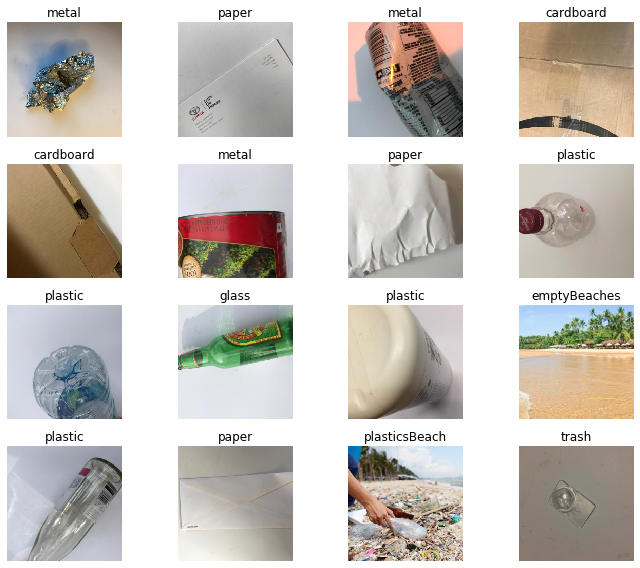

In [37]:
#showing pictures as a test
coastalDebris.show_batch(rows=10, figsize=(10,8))

In [38]:
learn = cnn_learner(coastalDebris,models.resnet34,metrics=error_rate)

In [39]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.69E-03
Min loss divided by 10: 6.76E-03


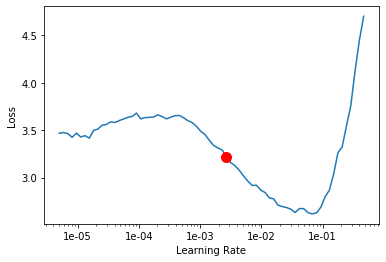

In [40]:
#showing learning rate

learn.lr_find(start_lr=1e-6, end_lr=1e1)
learn.recorder.plot(suggestion=True)
# learn.recorder.plot()

In [41]:
min_grad_lr = learn.recorder.min_grad_lr
min_grad_lr

0.0026915348039269153

In [42]:
#running epochs
learn.fit_one_cycle(20, max_lr=5.13e-03)

epoch,train_loss,valid_loss,error_rate,time
0,1.910523,0.847964,0.285322,00:54
1,1.058183,0.637302,0.204390,00:54
2,0.828597,0.764051,0.229081,00:53
3,0.798908,0.793367,0.240055,00:54
4,0.851542,1.141187,0.297668,00:54
5,0.928838,0.952461,0.255144,00:54
6,0.868788,0.968341,0.229081,00:54
7,0.742755,0.918652,0.234568,00:54
8,0.610719,0.761227,0.215364,00:54
9,0.463875,0.840223,0.215364,00:55


In [43]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()

In [44]:
#using torch + tensor to get the highest error pictures
torch.Tensor.ndim = property(lambda x: len(x.size()))

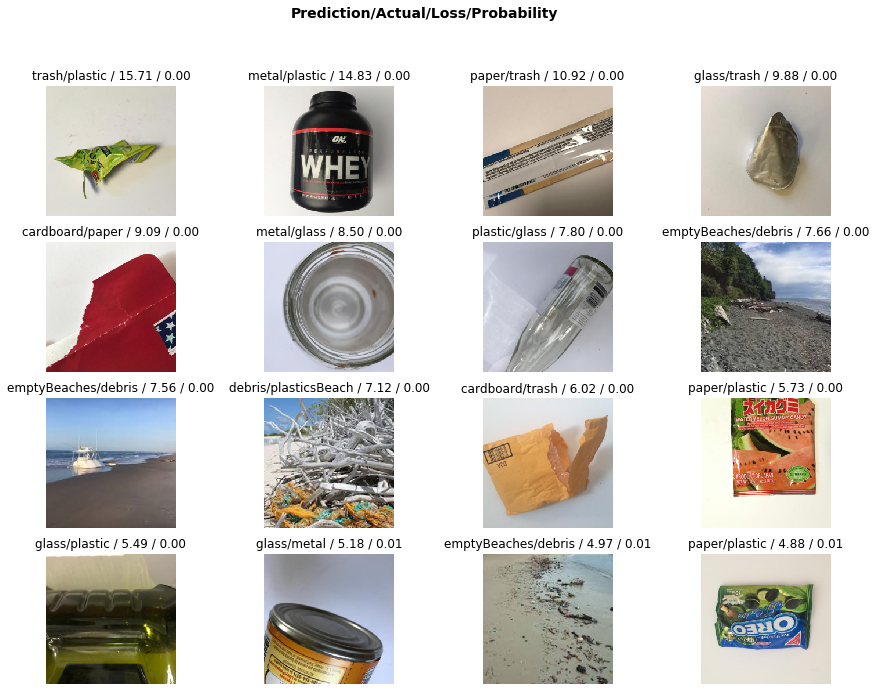

In [45]:
#shows the top 16 images that were identified incorrectly along with their statistics
interp.plot_top_losses(16, figsize=(15,11))

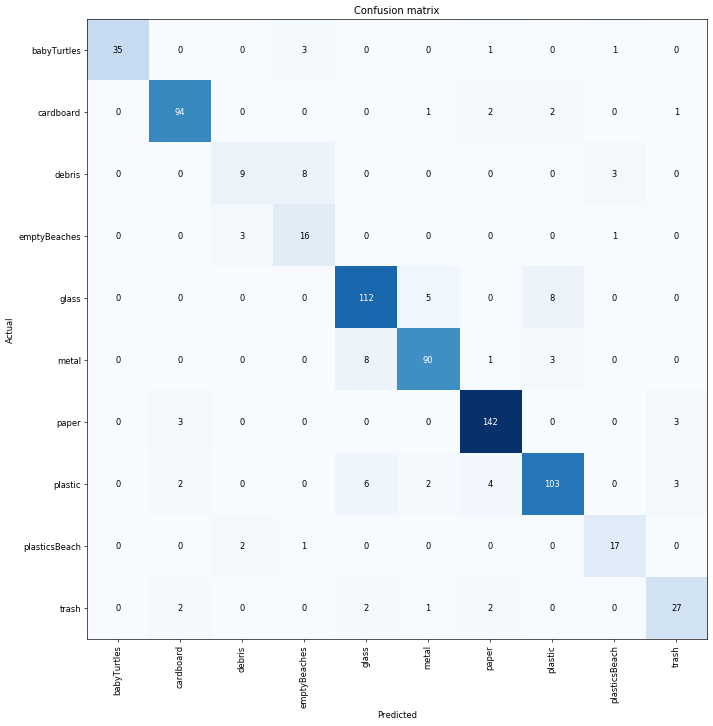

_cl_int_plot_top_losses [source] [test] _cl_int_plot_top_losses ( k , largest = True , figsize = (12, 12) , heatmap : bool = False , heatmap_thresh : int = 16 , alpha : float = 0.6 , cmap : str = 'magma' , show_text : bool = True , return_fig : bool = None ) → Optional [ Figure ] 
 
 × No tests found for _cl_int_plot_top_losses . To contribute a test please refer to this guide and this discussion . Show images in top_losses along with their prediction, actual, loss, and probability of actual class. 
 Show in docs

In [46]:
#confusion matrix shows that glass was confused for metal the most
doc(interp.plot_top_losses)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [47]:
interp.most_confused(min_val=2)

[('debris', 'emptyBeaches', 8),
 ('glass', 'plastic', 8),
 ('metal', 'glass', 8),
 ('plastic', 'glass', 6),
 ('glass', 'metal', 5),
 ('plastic', 'paper', 4),
 ('babyTurtles', 'emptyBeaches', 3),
 ('debris', 'plasticsBeach', 3),
 ('emptyBeaches', 'debris', 3),
 ('metal', 'plastic', 3),
 ('paper', 'cardboard', 3),
 ('paper', 'trash', 3),
 ('plastic', 'trash', 3),
 ('cardboard', 'paper', 2),
 ('cardboard', 'plastic', 2),
 ('plastic', 'cardboard', 2),
 ('plastic', 'metal', 2),
 ('plasticsBeach', 'debris', 2),
 ('trash', 'cardboard', 2),
 ('trash', 'glass', 2),
 ('trash', 'paper', 2)]

In [48]:
#trying to get a higher accuracy rate!
#learner.predict() only predicts on a single image, while learner.get_preds() 
#predicts on a set of images.
preds = learn.get_preds(ds_type=DatasetType.Test)

In [49]:
print(preds[0].shape)
preds[0]

torch.Size([735, 10])


tensor([[1.0000e+00, 2.3697e-12, 2.1129e-08,  ..., 1.2399e-08, 6.5918e-09,
         6.8087e-11],
        [9.9990e-01, 5.9096e-05, 4.7721e-06,  ..., 6.5478e-09, 2.3337e-05,
         4.2564e-08],
        [8.8860e-03, 3.9053e-04, 7.1321e-02,  ..., 2.5367e-05, 2.4931e-02,
         1.8730e-03],
        ...,
        [1.2604e-07, 8.4728e-07, 2.9368e-09,  ..., 7.5246e-07, 4.4586e-08,
         9.9991e-01],
        [5.2809e-09, 1.1058e-06, 1.3950e-10,  ..., 1.7008e-05, 3.9033e-08,
         9.9993e-01],
        [1.0892e-03, 2.1332e-01, 3.2639e-03,  ..., 8.9473e-03, 3.5236e-03,
         2.4455e-01]])

In [50]:
max_idxs = np.asarray(np.argmax(preds[0],axis=1))

In [51]:
yhat = []
for max_idx in max_idxs:
    yhat.append(coastalDebris.classes[max_idx])

In [52]:
yhat

['babyTurtles',
 'babyTurtles',
 'emptyBeaches',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'emptyBeaches',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'plasticsBeach',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'babyTurtles',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'metal',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'metal',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',
 'cardboard',


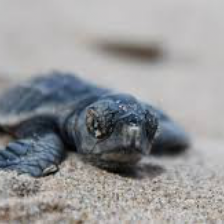

In [53]:
learn.data.test_ds[0][0]

In [54]:
y = []

for label_path in coastalDebris.test_ds.items:
    y.append(str(label_path))
#     print(label_path)
# pattern = re.compile("([a-z]+)[0-9]+")
pattern = re.compile("([A-Za-z]+)[0-9]+")
for i in range(len(y)):
    y[i] = pattern.search(y[i]).group(1)

In [55]:
# print(y)

In [56]:
## predicted values
print(yhat[0:5])
## actual values
print(y[0:5])

#only one was wrong in this set

['babyTurtles', 'babyTurtles', 'emptyBeaches', 'babyTurtles', 'babyTurtles']
['babyTurtles', 'babyTurtles', 'babyTurtles', 'babyTurtles', 'babyTurtles']


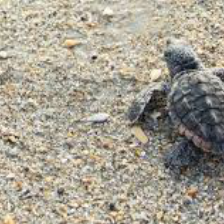

In [57]:
learn.data.test_ds[4][0]
#this is the picture that was predicted wrong by the machine (metal vs cardboard)

In [58]:
cm = confusion_matrix(y, yhat)
print(cm)

[[ 37   0   0   2 ...   0   0   1   0]
 [  0  97   0   0 ...   1   0   0   0]
 [  0   0   4   7 ...   0   0   9   0]
 [  0   0   3  15 ...   0   0   2   0]
 ...
 [  0   1   0   0 ... 143   2   0   1]
 [  0   0   0   0 ...   1 113   0   3]
 [  0   0   3   0 ...   0   0  17   0]
 [  0   1   0   0 ...   1   2   0  29]]


In [59]:
df_cm = pd.DataFrame(cm, classes, classes)
df_cm

,babyTurtles,debris,emptyBeaches,plasticsBeach,cardboard,glass,metal,paper,plastic,trash
babyTurtles,37,0,0,2,0,0,0,0,1,0
debris,0,97,0,0,0,3,1,0,0,0
emptyBeaches,0,0,4,7,0,0,0,0,9,0
plasticsBeach,0,0,3,15,0,0,0,0,2,0
cardboard,0,1,0,0,107,8,1,9,0,0
glass,0,0,0,0,9,90,1,2,0,1
metal,0,1,0,0,1,1,143,2,0,1
paper,0,0,0,0,4,0,1,113,0,3
plastic,0,0,3,0,0,0,0,0,17,0
trash,0,1,0,0,2,0,1,2,0,29


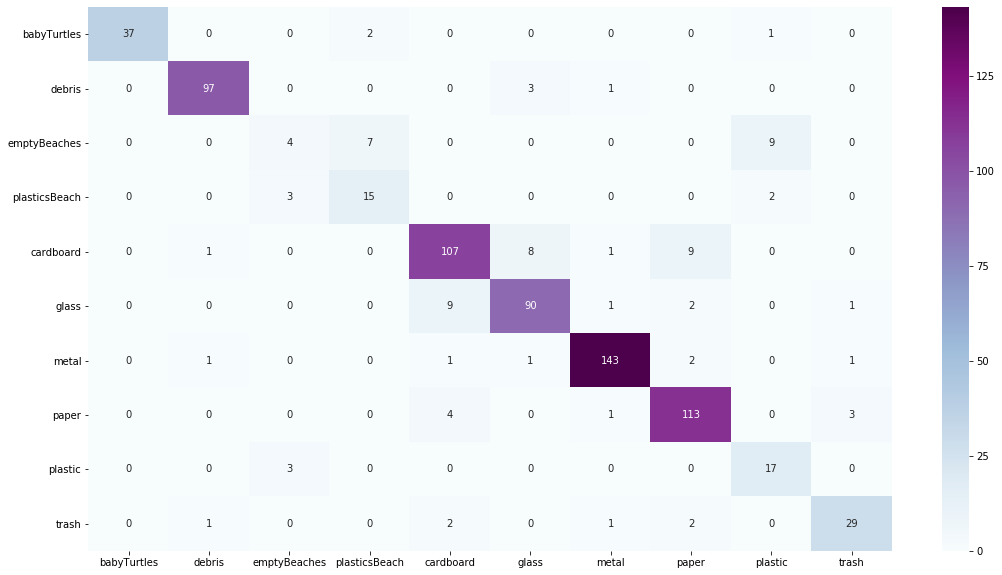

In [60]:
# df_cm = pd.DataFrame(cm, classes, classes) # changed waste_types to classes

plt.figure(figsize=(18,10))
sns.heatmap(df_cm, annot=True, fmt="d", cmap="BuPu")
plt.autoscale()
#used seaborn heatmaps library to make it pretty
#need to fix this because it's cut off but it shows most of the data
#edit: fixed with plt.autoscale!

In [61]:
correct = 0

for r in range(len(cm)):
    for c in range(len(cm)):
        if (r==c):
            correct += cm[r,c]
            
#accuracy equation! assigning correct to how much the machine got right

In [62]:
#putting correct into the accuracy equation divided by the total amount
accuracy = correct/sum(sum(cm))
accuracy

0.8870748299319728

In [63]:
#HUGE credits to https://medium.com/ml-and-automation/deep-learning-a-step-by-step-guide-using-fastai-9a5c55f9e4ce
#referenced this page so much
#dataset was sourced from kaggle 
#https://www.kaggle.com/asdasdasasdas/garbage-classification